In [29]:
from matplotlib import pyplot as plt 
import os
import pandas as pd


colors = {'oracle': 'tab:blue', 'scientific': 'tab:orange', 'active': 'tab:green', 'evolutionary': 'tab:red', 'random': 'tab:purple'}
labels = {'oracle': 'LLM - Oracle', 'scientific': 'LLM - Scientific', 'active': 'Active Learning', 'evolutionary': 'Evolutionary', 'random': 'Random Selection'}
named_bools = {True: 'seeded', False: 'unseeded'}

base_dir = os.path.join('data')
rollout_data_prefix = "all-rollouts"
k_data = pd.read_csv(os.path.join(base_dir, f'{rollout_data_prefix}-kltd.csv'))
d_data = pd.read_csv(os.path.join(base_dir, f'{rollout_data_prefix}-topkd.csv'))

experiment_names = ['oracle', 'scientific', 'active', 'evolutionary', 'random']
arch_morphs = ['liquid', 'string', 'membrane', 'vesicle', 'wormlike micelle', 'spherical micelle']

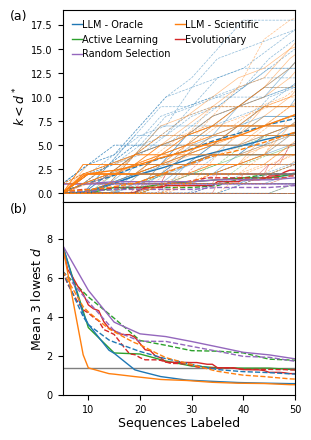

In [30]:
import numpy as np

lp = 2  # axis label padding

fig, axes = plt.subplots(2, 1, figsize=(3, 5), sharex='all')
fig.subplots_adjust(hspace=0)
ax = axes[0]

membrane_data = k_data.loc[k_data["Morphology"] == "membrane"]

for (experiment, seed_type), run_data in membrane_data.groupby(["Experiment", "Seed Type"]):
    c = colors[experiment]
    if seed_type == "seeded":
        ls = '-'
        lab = labels[experiment]
    elif seed_type == "unseeded":
        ls = '--'
        lab = None
    else:
        raise ValueError()
    seed_offset = int((seed_type == "seeded") and experiment != 'random')
    v = run_data.loc[:, "kltd after 1 Labels":].values - seed_offset 
    ax.plot(np.arange(v.shape[1])+1, v.mean(axis=0), color=c, alpha=1.0, lw=1.0, ls=ls)
    for j in range(v.shape[0]):
        ax.plot(np.arange(v.shape[1])+1, v[j], color=c, alpha=0.5, lw=0.5, ls=ls)

ax.set_ylabel('$k < d^*$', labelpad=lp, fontsize=9)
ax.set_xlabel('Sequences Labeled', labelpad=lp, fontsize=9)
ax.set_xlim(5)
ax.tick_params(axis='both', which='major', labelsize=7)

ax = axes[1]

membrane_data = d_data.loc[d_data["Morphology"] == "membrane"]

for (experiment, seed_type), run_data in membrane_data.groupby(["Experiment", "Seed Type"]):
    c = colors[experiment]
    if seed_type == "seeded":
        ls = '-'
        lab = labels[experiment]
    elif seed_type == "unseeded":
        ls = '--'
        lab = None
    else:
        raise ValueError()
    seed_offset = int((seed_type == "seeded") and experiment != 'random')
    v = run_data.loc[:, "topkd after 1 Labels":].values 
    ax.plot(np.arange(v.shape[1])+1, v.mean(axis=0), color=c, alpha=1.0, lw=1.0, ls=ls)

ax.plot([1, 50], [1.34, 1.34], 'k-', alpha=0.5, lw=1.0, zorder=0)#, label='Threshold')

ax.set_ylabel('Mean 3 lowest $d$', labelpad=lp, fontsize=9)
ax.set_xlabel('Sequences Labeled', labelpad=lp, fontsize=9)
ax.set_ylim(0, 9.9)
ax.set_xlim(5, 50)
ax.tick_params(axis='both', which='major', labelsize=7)

axes[0].text(-0.15, 1.0, f'(a)', ha='right', va='top', fontsize=9, transform=axes[0].transAxes)
axes[1].text(-0.15, 1.0, f'(b)', ha='right', va='top', fontsize=9, transform=axes[1].transAxes)

for experiment in ['oracle', 'active', 'random', 'scientific', 'evolutionary']:
    c = colors[experiment]
    axes[0].plot(np.nan, np.nan, color=c, alpha=1.0, lw=1.0, ls='-', label=labels[experiment])

axes[0].legend(loc='upper left', ncol=2, columnspacing=0.5, borderpad=0.5, handletextpad=0, handlelength=1, fontsize=7, frameon=False)

Text(1.0, -0.4, 'Sequences Labeled')

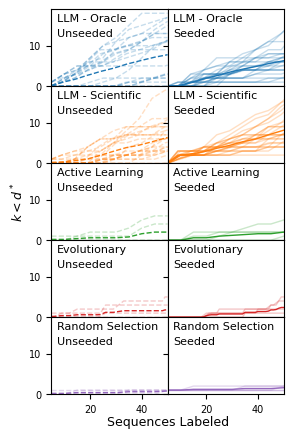

In [31]:
fig, axes = plt.subplots(5, 2, figsize=(3, 5), sharex='all', sharey='all')
fig.subplots_adjust(hspace=0, wspace=0)

membrane_data = k_data.loc[k_data["Morphology"] == "membrane"]

exp_map = {v: k for k, v in enumerate(labels.keys())}
seed_map = {'unseeded': 0, 'seeded': 1}
for (experiment, seed_type), run_data in membrane_data.groupby(["Experiment", "Seed Type"]):
    ax = axes[exp_map[experiment], seed_map[seed_type]]
    
    c = colors[experiment]
    if seed_type == "seeded":
        ls = '-'
        lab = labels[experiment]
    elif seed_type == "unseeded":
        ls = '--'
        lab = None
    else:
        raise ValueError()
    seed_offset = int((seed_type == "seeded") and experiment != 'random')
    v = run_data.loc[:, "kltd after 1 Labels":].values - seed_offset 
    ax.plot(np.arange(v.shape[1])+1, v.mean(axis=0), color=c, alpha=1.0, lw=1.0, ls=ls)
    for j in range(v.shape[0]):
        ax.plot(np.arange(v.shape[1])+1, v[j], color=c, alpha=0.25, lw=1.0, ls=ls)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.text(0.05, 0.95, f"{labels[experiment]}", fontsize=8, transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.75, f"{seed_type.title()}", fontsize=8, transform=ax.transAxes, ha='left', va='top')

axes[0, 0].set_ylim(0, 19)
axes[0, 0].set_xlim(5, 50)

axes[2, 0].set_ylabel('$k < d^*$', labelpad=lp, fontsize=9)
axes[-1, 0].text(1.0, -0.40, 'Sequences Labeled', fontsize=9, transform=axes[-1, 0].transAxes, ha='center')

In [24]:
fig.savefig(os.path.join('figures', 'rev2', 'fig_s2.pdf'), dpi=600, bbox_inches='tight')

Text(1.0, -0.4, 'Sequences Labeled')

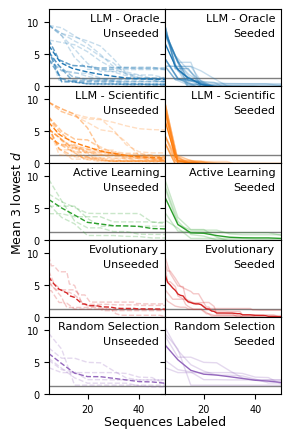

In [32]:
fig, axes = plt.subplots(5, 2, figsize=(3, 5), sharex='all', sharey='all')
fig.subplots_adjust(hspace=0, wspace=0)

membrane_data = d_data.loc[k_data["Morphology"] == "membrane"]

for (experiment, seed_type), run_data in membrane_data.groupby(["Experiment", "Seed Type"]):
    ax = axes[exp_map[experiment], seed_map[seed_type]]
    
    c = colors[experiment]
    if seed_type == "seeded":
        ls = '-'
        lab = labels[experiment]
    elif seed_type == "unseeded":
        ls = '--'
        lab = None
    else:
        raise ValueError()
    seed_offset = int((seed_type == "seeded") and experiment != 'random')
    v = run_data.loc[:, "topkd after 1 Labels":].values - seed_offset 
    ax.plot(np.arange(v.shape[1])+1, v.mean(axis=0), color=c, alpha=1.0, lw=1.0, ls=ls)
    for j in range(v.shape[0]):
        ax.plot(np.arange(v.shape[1])+1, v[j], color=c, alpha=0.25, lw=1.0, ls=ls)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.plot([1, 50], [1.34, 1.34], 'k-', alpha=0.5, lw=1.0, zorder=0)#, label='Threshold')
    ax.text(0.95, 0.95, f"{labels[experiment]}", fontsize=8, transform=ax.transAxes, ha='right', va='top')
    ax.text(0.95, 0.75, f"{seed_type.title()}", fontsize=8, transform=ax.transAxes, ha='right', va='top')

axes[0, 0].set_ylim(0, 12)
axes[0, 0].set_xlim(5, 50)

axes[2, 0].set_ylabel('Mean 3 lowest $d$', labelpad=lp, fontsize=9)
axes[-1, 0].text(1.0, -0.40, 'Sequences Labeled', fontsize=9, transform=axes[-1, 0].transAxes, ha='center')

In [26]:
fig.savefig(os.path.join('figures', 'rev2', 'fig_s1.pdf'), dpi=600, bbox_inches='tight')